In [94]:
import sys
import os
from time import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm  

In [95]:


params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);

plt.style.use('seaborn-v0_8-darkgrid') 

TEST_SIZE = 0.25

<Figure size 1500x500 with 0 Axes>

In [96]:
inpDir = os.path.join('Input')
data_df = pd.read_csv( 'boston_house_price.csv')
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


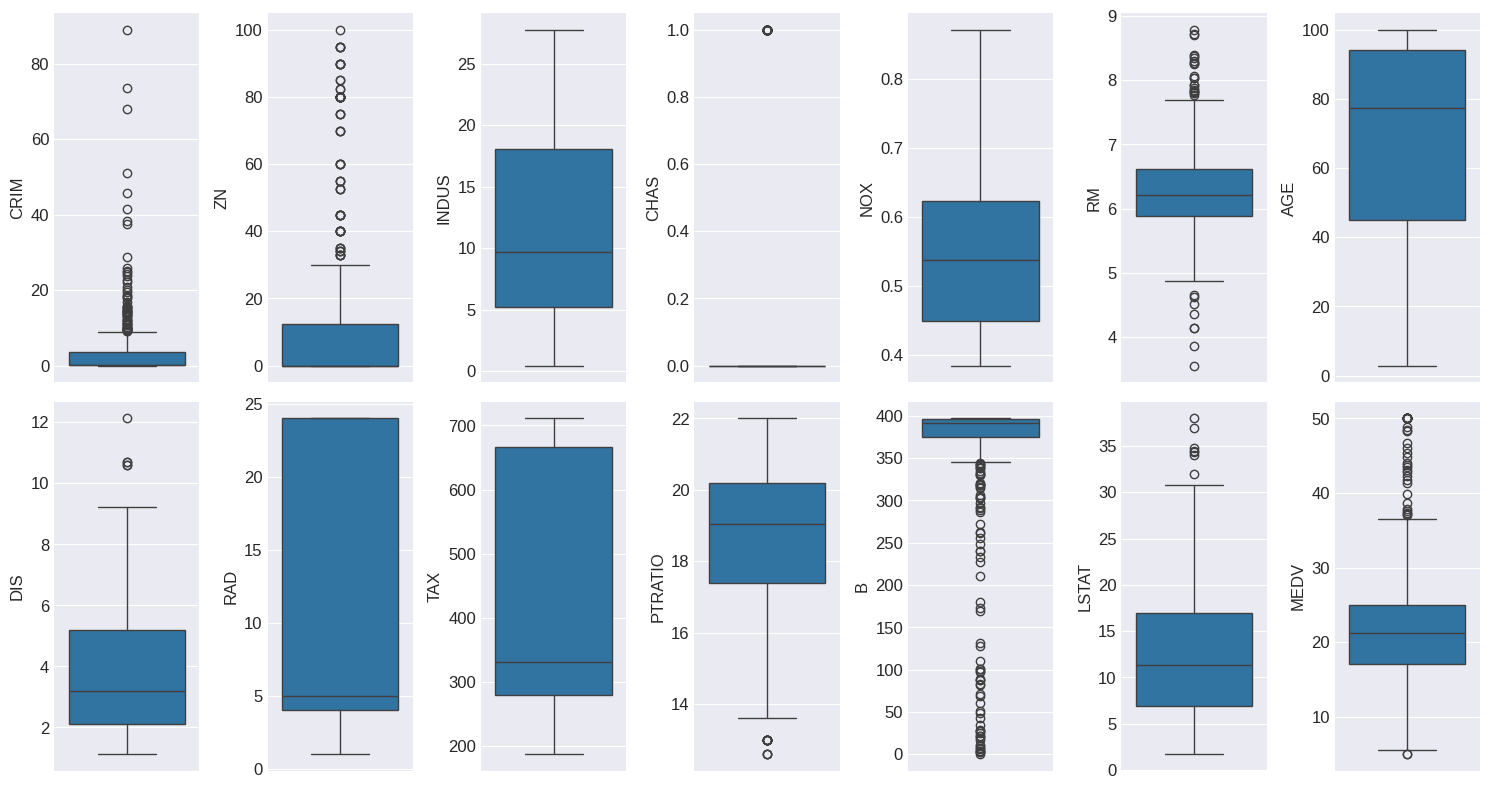

In [97]:
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(15, 8))
axes = axes.flatten()

for count, col in enumerate(data_df.columns):
    ax = axes[count]
    sns.boxplot(y=col, data=data_df, ax=ax)

plt.tight_layout();

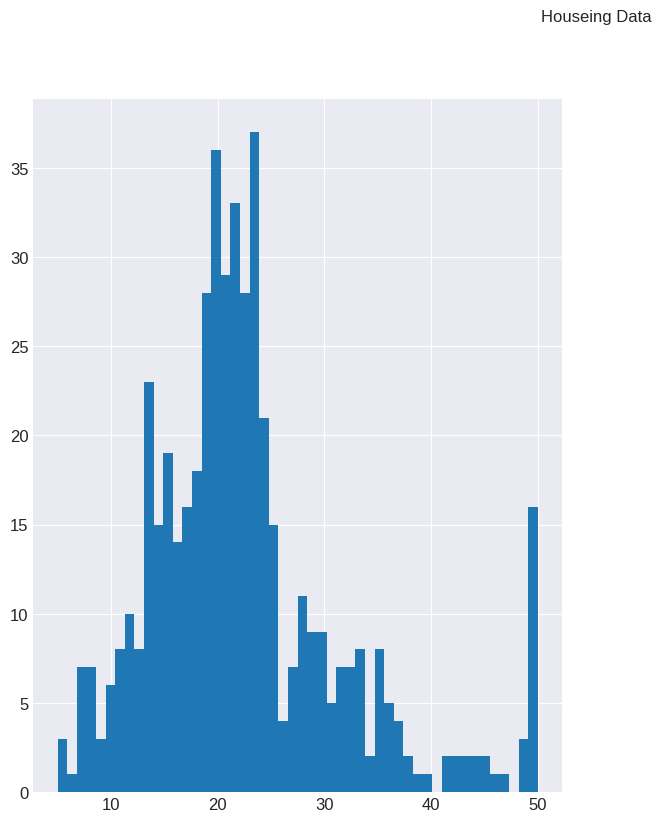

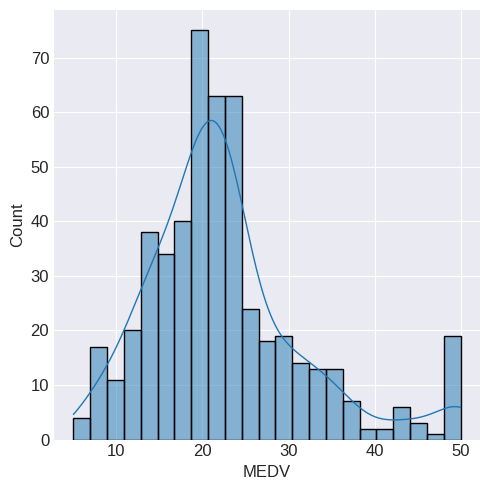

In [98]:
fig = plt.figure( figsize = (15 , 9))
fig.suptitle('Houseing Data')
ax = fig.add_subplot(1,2,1)
n, bins, patches = ax.hist(data_df['MEDV'], 50)
ax.axis('tight')
sns.displot(data=data_df, x ='MEDV', kde=True)
plt.tight_layout()

plt.show()

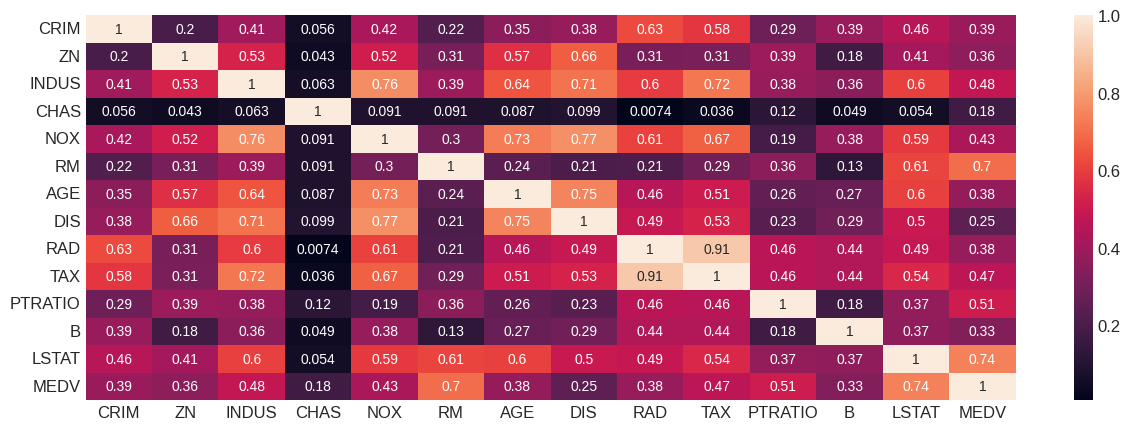

In [99]:
sns.heatmap(data_df.corr().abs(), annot=True);

In [100]:
rel_col = ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
data_df = data_df[rel_col].copy()
data_df.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


In [101]:
data_df.shape

(506, 7)

In [102]:
data_df = data_df[data_df['MEDV']<50].copy()

In [103]:
data_df.shape

(490, 7)

In [104]:
scale = StandardScaler()
features_df = data_df.drop('MEDV', axis = 1)
label_df = data_df['MEDV']
X = scale.fit_transform(features_df)
Y = label_df.to_numpy()

In [105]:
X.shape, Y.shape

((490, 6), (490,))

In [106]:
from sklearn.linear_model import LinearRegression, LogisticRegression
reg = LinearRegression()
reg.fit(X, Y)
y_pred = reg.predict(X)

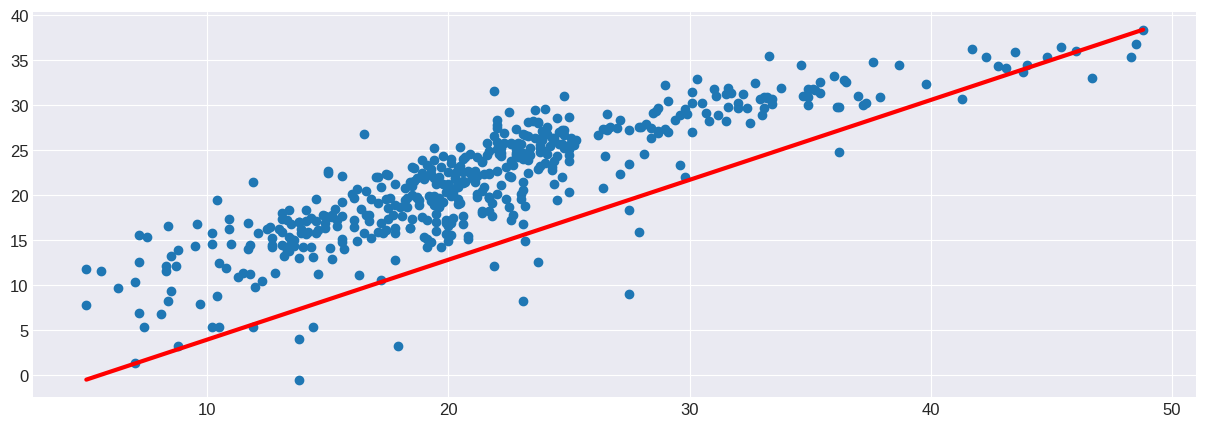

In [107]:
plt.scatter(Y, y_pred)
plt.plot([Y.min(), Y.max()], [y_pred.min(), y_pred.max()], c='r', lw = 3)

In [108]:
from sklearn import datasets
RANDOM_STATE = 24
N_SAMPLES = 1000
NOISE = 0.2

from sklearn.datasets import make_moons
X, y = datasets.make_moons(n_samples=N_SAMPLES,
                           shuffle=True,
                           noise=NOISE,
                           random_state=RANDOM_STATE)
X[:5], y[:5]



(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0]))

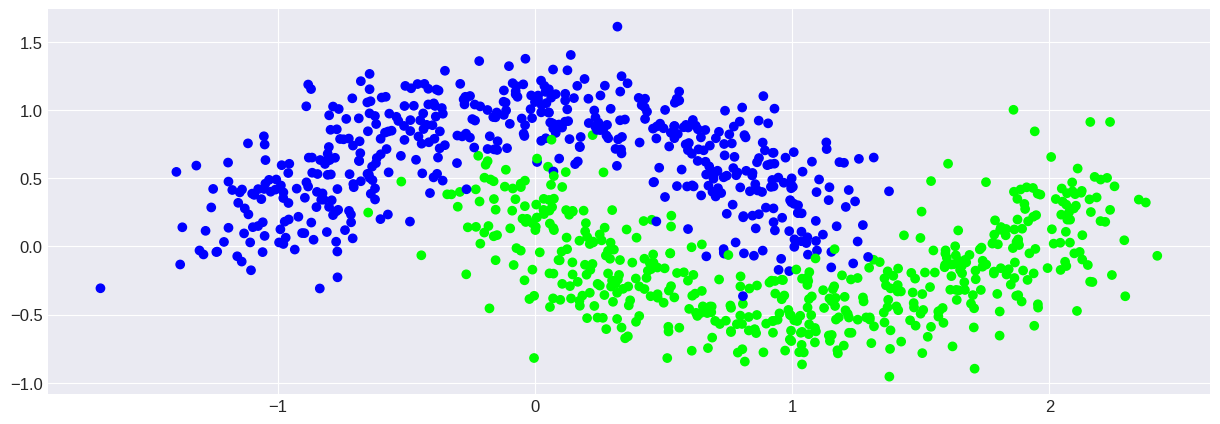

In [109]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap = plt.cm.brg);

In [110]:
clf = LogisticRegression()
clf.fit(X,y)
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

0.869

In [ ]:
fn_plot_decision_boundary